 ### Udacity Data Analyst Nanodegree
# Identify Fraud from Enron Email
   ###### By Areej Alashjaee

___________________________________________________________

# Overview

The purpose of this project to detect person of interest (poi) in Enron scandal from a given dataset,downloaded from this github https://github.com/udacity/ud120-projects.

This project will folow these steps below:

- Data Exploration
- Clean the dataset based on some observations. 
- Add new features into the dataset.
- Features select
- Pick an algorithm
- Tune an algorithm

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives.

In [5]:
import pickle
import sys
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import numpy as np
from pprint import pprint
import random
import os
import re
import operator
import scipy.stats
from time import time
import pprint 

sys.path.append("../tools/")
os.chdir('/Users/lama/Desktop/P5V2/final_project')

import tester



Populating the interactive namespace from numpy and matplotlib


In [6]:
# loads up the dataset (pickled dict of dicts)
data_dict = pickle.load(open("final_project_dataset.pkl", "r"))
df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=np.float)


In [7]:
# Number of data 
len(data_dict)

146

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null float64
director_fees                17 non-null float64
deferred_income              49 non-null fl

In [9]:
df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=np.float)
df.head(20)

salary  to_messages  deferral_payments  \
ALLEN PHILLIP K       201955.0       2902.0          2869717.0   
BADUM JAMES P              NaN          NaN           178980.0   
BANNANTINE JAMES M       477.0        566.0                NaN   
BAXTER JOHN C         267102.0          NaN          1295738.0   
BAY FRANKLIN R        239671.0          NaN           260455.0   
BAZELIDES PHILIP J     80818.0          NaN           684694.0   
BECK SALLY W          231330.0       7315.0                NaN   
BELDEN TIMOTHY N      213999.0       7991.0          2144013.0   
BELFER ROBERT              NaN          NaN          -102500.0   
BERBERIAN DAVID       216582.0          NaN                NaN   
BERGSIEKER RICHARD P  187922.0        383.0                NaN   
BHATNAGAR SANJAY           NaN        523.0                NaN   
BIBI PHILIPPE A       213625.0       1607.0                NaN   
BLACHMAN JEREMY M     248546.0       2475.0                NaN   
BLAKE JR. NORMAN P         NaN          NaN                NaN   
BOWEN JR RAYMOND M    278601.0       1858.0                NaN   
BROWN MICHAEL              NaN       1486.0                NaN   
BUCHANAN HAROLD G     248017.0       1088.0                NaN   
BUTTS ROBERT H        261516.0          NaN                NaN   
BUY RICHARD B         330546.0       3523.0           649584.0   

                      total_payments  exercised_stock_options      bonus  \
ALLEN PHILLIP K            4484442.0                1729541.0  4175000.0   
BADUM JAMES P               182466.0                 257817.0        NaN   
BANNANTINE JAMES M          916197.0                4046157.0        NaN   
BAXTER JOHN C              5634343.0                6680544.0  1200000.0   
BAY FRANKLIN R              827696.0                      NaN   400000.0   
BAZELIDES PHILIP J          860136.0                1599641.0        NaN   
BECK SALLY W                969068.0                      NaN   700000.0   
BELDEN TIMOTHY N           5501630.0                 953136.0  5249999.0   
BELFER ROBERT               102500.0                   3285.0        NaN   
BERBERIAN DAVID             228474.0                1624396.0        NaN   
BERGSIEKER RICHARD P        618850.0                      NaN   250000.0   
BHATNAGAR SANJAY          15456290.0                2604490.0        NaN   
BIBI PHILIPPE A            2047593.0                1465734.0  1000000.0   
BLACHMAN JEREMY M          2014835.0                 765313.0   850000.0   
BLAKE JR. NORMAN P            1279.0                      NaN        NaN   
BOWEN JR RAYMOND M         2669589.0                      NaN  1350000.0   
BROWN MICHAEL                49288.0                      NaN        NaN   
BUCHANAN HAROLD G          1054637.0                 825464.0   500000.0   
BUTTS ROBERT H             1271582.0                      NaN   750000.0   
BUY RICHARD B              2355702.0                2542813.0   900000.0   

                      restricted_stock  shared_receipt_with_poi  \
ALLEN PHILLIP K               126027.0                   1407.0   
BADUM JAMES P                      NaN                      NaN   
BANNANTINE JAMES M           1757552.0                    465.0   
BAXTER JOHN C                3942714.0                      NaN   
BAY FRANKLIN R                145796.0                      NaN   
BAZELIDES PHILIP J                 NaN                      NaN   
BECK SALLY W                  126027.0                   2639.0   
BELDEN TIMOTHY N              157569.0                   5521.0   
BELFER ROBERT                      NaN                      NaN   
BERBERIAN DAVID               869220.0                      NaN   
BERGSIEKER RICHARD P          659249.0                    233.0   
BHATNAGAR SANJAY            -2604490.0                    463.0   
BIBI PHILIPPE A               378082.0                   1336.0   
BLACHMAN JEREMY M             189041.0                   2326.0   
BLAKE JR. NORMAN P                 

In [10]:
#print POI and total number
print('\nNumber of persons: ' + str(len(data_dict)))
print "Number of feature for each person:",len(data_dict.itervalues().next())



Number of persons: 146
Number of feature for each person: 21


In [11]:
x=0
for i in data_dict:
        if data_dict[i]["poi"]==1:
            x+=1
            
print "number of POI's in the dataset:",x

print "Number of non-POIs : %i" %(146-x)
print "Percentage of POIs from the total : %i" %(x*100/146)

number of POI's in the dataset: 18
Number of non-POIs : 128
Percentage of POIs from the total : 12


POIs = peopelse who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity. Of the 146 people in the dataset, 18 were labeled as POI, persons of interest.

In [12]:
names=data_dict.keys()
print names

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

###### Statistics of dependent variable poi

The mean value indicates that only 12.4% of poi is True.
In the above result, count is the number of total non-NaN values.
The count of poi equals to the total rows, showing that every row has a poi value.


In [13]:
print df.iloc[0]

salary                                        201955
to_messages                                     2902
deferral_payments                        2.86972e+06
total_payments                           4.48444e+06
exercised_stock_options                  1.72954e+06
bonus                                      4.175e+06
restricted_stock                              126027
shared_receipt_with_poi                         1407
restricted_stock_deferred                    -126027
total_stock_value                        1.72954e+06
expenses                                       13868
loan_advances                                    NaN
from_messages                                   2195
other                                            152
from_this_person_to_poi                           65
poi                                                0
director_fees                                    NaN
deferred_income                         -3.08106e+06
long_term_incentive                           

In [14]:
## how many features are available
len(data_dict[data_dict.keys()[0]])



21

In [15]:
import pprint
# the key of features for the first key
features_list = data_dict[data_dict.keys()[0]].keys() 
pprint.pprint(features_list)

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']


#  Feature selection
Create  The_list to include all the feature names from the dataset, the first feature must be "poi" .


In [16]:
The_list = ['poi']  + [feature for feature in df if feature != 'poi' and feature != 'email_address']
## Select only the features from the list
df = df[The_list]
print "The Features: "
print The_list

The Features: 
['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person']


This function to remove the "email_address" feature, because it's a text and its information is correlated to the Name of the person.

In [17]:
# count people of interest
count_poi = 0
poi_name = []
for entry in data_dict:
    if data_dict[entry]['poi'] == 1:
        count_poi += 1
        poi_name.append(entry)
print "There are " + str(count_poi) + " person of interest."
print poi_name


There are 18 person of interest.
['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']


In [18]:
# create a dictionary of person and count of NaN pairs
missing_value = {}

for person in data_dict:
    missing_value[person] = 0
    for feature in data_dict[person]:
        if data_dict[person][feature] == "NaN":
            missing_value[person] +=1

# sort the dictionary by ascending ordering of values 
missing_value = sorted(missing_value.items(), key=operator.itemgetter(1))

# print top 5 those who have the most NaN
pprint.pprint(missing_value[-5:])

[('WHALEY DAVID A', 18),
 ('WROBEL BRUCE', 18),
 ('THE TRAVEL AGENCY IN THE PARK', 18),
 ('GRAMM WENDY L', 18),
 ('LOCKHART EUGENE E', 20)]


In [19]:
# to summary statistics of each feature, I use pandas dataframe
# convert a python dictionary to a dataframe 
# with features as columns and people as rows
df = pd.DataFrame(data_dict)
df_trans = df.transpose()

In [20]:
# to get numerical statistics, replace string "NaN" to zero (0)
def to_zero(v):
    if v == 'NaN':
        v = 0
    return v
df_trans = df_trans.applymap(to_zero)

# check any numpy NaN
print df_trans.isnull().sum().sum()

# summary of variable distribution and center statistics
df_trans.describe()

0


bonus  deferral_payments  deferred_income  director_fees  \
count  1.460000e+02       1.460000e+02     1.460000e+02   1.460000e+02   
mean   1.333474e+06       4.387965e+05    -3.827622e+05   1.942249e+04   
std    8.094029e+06       2.741325e+06     2.378250e+06   1.190543e+05   
min    0.000000e+00      -1.025000e+05    -2.799289e+07   0.000000e+00   
25%    0.000000e+00       0.000000e+00    -3.792600e+04   0.000000e+00   
50%    3.000000e+05       0.000000e+00     0.000000e+00   0.000000e+00   
75%    8.000000e+05       9.684500e+03     0.000000e+00   0.000000e+00   
max    9.734362e+07       3.208340e+07     0.000000e+00   1.398517e+06   

       exercised_stock_options      expenses  from_messages  \
count             1.460000e+02  1.460000e+02     146.000000   
mean              4.182736e+06  7.074827e+04     358.602740   
std               2.607040e+07  4.327163e+05    1441.259868   
min               0.000000e+00  0.000000e+00       0.000000   
25%               0.000000e+00  0.000000e+00       0.000000   
50%               6.082935e+05  2.018200e+04      16.500000   
75%               1.714221e+06  5.374075e+04      51.250000   
max               3.117640e+08  5.235198e+06   14368.000000   

       from_poi_to_this_person  from_this_person_to_poi  loan_advances  \
count               146.000000               146.000000   1.460000e+02   
mean                 38.226027                24.287671   1.149658e+06   
std                  73.901124                79.278206   9.649342e+06   
min                   0.000000                 0.000000   0.000000e+00   
25%                   0.000000                 0.000000   0.000000e+00   
50%                   2.500000                 0.000000   0.000000e+00   
75%                  40.750000                13.750000   0.000000e+00   
max                 528.000000               609.000000   8.392500e+07   

       long_term_incentive         other  restricted_stock  \
count         1.460000e+02  1.460000e+02      1.460000e+02   
mean          6.646839e+05  5.854318e+05      1.749257e+06   
std           4.046072e+06  3.682345e+06      1.089995e+07   
min           0.000000e+00  0.000000e+00     -2.604490e+06   
25%           0.000000e+00  0.000000e+00      8.115000e+03   
50%           0.000000e+00  9.595000e+02      3.605280e+05   
75%           3.750648e+05  1.506065e+05      8.145280e+05   
max           4.852193e+07  4.266759e+07      1.303223e+08   

       restricted_stock_deferred        salary  shared_receipt_with_poi  \
count               1.460000e+02  1.460000e+02               146.000000   
mean                2.051637e+04  3.658114e+05               692.986301   
std                 1.439661e+06  2.203575e+06              1072.969492   
min                -7.576788e+06  0.000000e+00                 0.000000   
25%                 0.000000e+00  0.000000e+00                 0.000000   
50%                 0.000000e+00  2.105960e+05               102.500000   
75%                 0.000000e+00  2.708505e+05               893.500000   
max                 1.545629e+07  2.670423e+07              5521.000000   

        to_messages  total_payments  total_stock_value  
count    146.000000    1.460000e+02       1.460000e+02  
mean    1221.589041    4.350622e+06       5.846018e+06  
std     2226.770637    2.693448e+07       3.624681e+07  
min        0.000000    0.000000e+00      -4.409300e+04  
25%        0.000000    9.394475e+04       2.288695e+05  
50%      289.000000    9.413595e+05       9.659550e+05  
75%     1585.750000    1.968287e+06       2.319991e+06  
max    15149.000000    3.098866e+08       4.345095e+08

In [21]:
# to get numerical statistics, replace string "NaN" to zero (0)
def to_zero(v):
    if v == 'NaN':
        v = 0
    return v
df_trans = df_trans.applymap(to_zero)

# check any numpy NaN
print df_trans.isnull().sum().sum()

# summary of variable distribution and center statistics
df_trans.describe()

0


bonus  deferral_payments  deferred_income  director_fees  \
count  1.460000e+02       1.460000e+02     1.460000e+02   1.460000e+02   
mean   1.333474e+06       4.387965e+05    -3.827622e+05   1.942249e+04   
std    8.094029e+06       2.741325e+06     2.378250e+06   1.190543e+05   
min    0.000000e+00      -1.025000e+05    -2.799289e+07   0.000000e+00   
25%    0.000000e+00       0.000000e+00    -3.792600e+04   0.000000e+00   
50%    3.000000e+05       0.000000e+00     0.000000e+00   0.000000e+00   
75%    8.000000e+05       9.684500e+03     0.000000e+00   0.000000e+00   
max    9.734362e+07       3.208340e+07     0.000000e+00   1.398517e+06   

       exercised_stock_options      expenses  from_messages  \
count             1.460000e+02  1.460000e+02     146.000000   
mean              4.182736e+06  7.074827e+04     358.602740   
std               2.607040e+07  4.327163e+05    1441.259868   
min               0.000000e+00  0.000000e+00       0.000000   
25%               0.000000e+00  0.000000e+00       0.000000   
50%               6.082935e+05  2.018200e+04      16.500000   
75%               1.714221e+06  5.374075e+04      51.250000   
max               3.117640e+08  5.235198e+06   14368.000000   

       from_poi_to_this_person  from_this_person_to_poi  loan_advances  \
count               146.000000               146.000000   1.460000e+02   
mean                 38.226027                24.287671   1.149658e+06   
std                  73.901124                79.278206   9.649342e+06   
min                   0.000000                 0.000000   0.000000e+00   
25%                   0.000000                 0.000000   0.000000e+00   
50%                   2.500000                 0.000000   0.000000e+00   
75%                  40.750000                13.750000   0.000000e+00   
max                 528.000000               609.000000   8.392500e+07   

       long_term_incentive         other  restricted_stock  \
count         1.460000e+02  1.460000e+02      1.460000e+02   
mean          6.646839e+05  5.854318e+05      1.749257e+06   
std           4.046072e+06  3.682345e+06      1.089995e+07   
min           0.000000e+00  0.000000e+00     -2.604490e+06   
25%           0.000000e+00  0.000000e+00      8.115000e+03   
50%           0.000000e+00  9.595000e+02      3.605280e+05   
75%           3.750648e+05  1.506065e+05      8.145280e+05   
max           4.852193e+07  4.266759e+07      1.303223e+08   

       restricted_stock_deferred        salary  shared_receipt_with_poi  \
count               1.460000e+02  1.460000e+02               146.000000   
mean                2.051637e+04  3.658114e+05               692.986301   
std                 1.439661e+06  2.203575e+06              1072.969492   
min                -7.576788e+06  0.000000e+00                 0.000000   
25%                 0.000000e+00  0.000000e+00                 0.000000   
50%                 0.000000e+00  2.105960e+05               102.500000   
75%                 0.000000e+00  2.708505e+05               893.500000   
max                 1.545629e+07  2.670423e+07              5521.000000   

        to_messages  total_payments  total_stock_value  
count    146.000000    1.460000e+02       1.460000e+02  
mean    1221.589041    4.350622e+06       5.846018e+06  
std     2226.770637    2.693448e+07       3.624681e+07  
min        0.000000    0.000000e+00      -4.409300e+04  
25%        0.000000    9.394475e+04       2.288695e+05  
50%      289.000000    9.413595e+05       9.659550e+05  
75%     1585.750000    1.968287e+06       2.319991e+06  
max    15149.000000    3.098866e+08       4.345095e+08

In [22]:
#How many data have “NaN” for their "long-term-incentives"
count_total_incentives_NaN = 0
for entry in data_dict:
    if data_dict[entry]['long_term_incentive'] == 'NaN':
        count_total_incentives_NaN += 1
print 'NaN data for long_term_incentives:', count_total_incentives_NaN

NaN data for long_term_incentives: 80


In [23]:
# I defined outliers as being above of 99% quantile here
# get lists of people above 99% quantile for each feature
highest = {}
for column in df_trans.columns:
    if df_trans[column].dtypes == "int64":
        highest[column]=[]
        q = df_trans[column].quantile(0.99)
        highest[column] = df_trans[df_trans[column] > q].index.tolist()
    
pprint.pprint(highest)



{'bonus': ['LAVORATO JOHN J', 'TOTAL'],
 'deferral_payments': ['FREVERT MARK A', 'TOTAL'],
 'deferred_income': [],
 'director_fees': ['BHATNAGAR SANJAY', 'TOTAL'],
 'exercised_stock_options': ['LAY KENNETH L', 'TOTAL'],
 'expenses': ['MCCLELLAN GEORGE', 'TOTAL'],
 'from_messages': ['KAMINSKI WINCENTY J', 'KEAN STEVEN J'],
 'from_poi_to_this_person': ['DIETRICH JANET R', 'LAVORATO JOHN J'],
 'from_this_person_to_poi': ['DELAINEY DAVID W', 'LAVORATO JOHN J'],
 'loan_advances': ['LAY KENNETH L', 'TOTAL'],
 'long_term_incentive': ['MARTIN AMANDA K', 'TOTAL'],
 'other': ['LAY KENNETH L', 'TOTAL'],
 'restricted_stock': ['LAY KENNETH L', 'TOTAL'],
 'restricted_stock_deferred': ['BELFER ROBERT', 'BHATNAGAR SANJAY'],
 'salary': ['SKILLING JEFFREY K', 'TOTAL'],
 'shared_receipt_with_poi': ['BELDEN TIMOTHY N', 'SHAPIRO RICHARD S'],
 'to_messages': ['KEAN STEVEN J', 'SHAPIRO RICHARD S'],
 'total_payments': ['LAY KENNETH L', 'TOTAL'],
 'total_stock_value': ['LAY KENNETH L', 'TOTAL']}


In [24]:
# summarize the previous dictionary, highest
# create a dictionary of outliers and the frequency of being outlier
highest_count = {}
for feature in highest:
    for person in highest[feature]:
        if person not in highest_count:
            highest_count[person] = 1
        else:
            highest_count[person] += 1
            
highest_count = sorted(highest_count.items(), key=operator.itemgetter(1))   
highest_count

[('DELAINEY DAVID W', 1),
 ('MARTIN AMANDA K', 1),
 ('SKILLING JEFFREY K', 1),
 ('BELDEN TIMOTHY N', 1),
 ('DIETRICH JANET R', 1),
 ('FREVERT MARK A', 1),
 ('KAMINSKI WINCENTY J', 1),
 ('BELFER ROBERT', 1),
 ('MCCLELLAN GEORGE', 1),
 ('KEAN STEVEN J', 2),
 ('BHATNAGAR SANJAY', 2),
 ('SHAPIRO RICHARD S', 2),
 ('LAVORATO JOHN J', 3),
 ('LAY KENNETH L', 6),
 ('TOTAL', 12)]

In [25]:
df[['LOCKHART EUGENE E', 'GRAMM WENDY L', \
    'THE TRAVEL AGENCY IN THE PARK', \
    'WROBEL BRUCE', 'WHALEY DAVID A', \
    'TOTAL', 'LAY KENNETH L', 'LAVORATO JOHN J']]

LOCKHART EUGENE E GRAMM WENDY L  \
bonus                                   NaN           NaN   
deferral_payments                       NaN           NaN   
deferred_income                         NaN           NaN   
director_fees                           NaN        119292   
email_address                           NaN           NaN   
exercised_stock_options                 NaN           NaN   
expenses                                NaN           NaN   
from_messages                           NaN           NaN   
from_poi_to_this_person                 NaN           NaN   
from_this_person_to_poi                 NaN           NaN   
loan_advances                           NaN           NaN   
long_term_incentive                     NaN           NaN   
other                                   NaN           NaN   
poi                                   False         False   
restricted_stock                        NaN           NaN   
restricted_stock_deferred               NaN           NaN   
salary                                  NaN           NaN   
shared_receipt_with_poi                 NaN           NaN   
to_messages                             NaN           NaN   
total_payments                          NaN        119292   
total_stock_value                       NaN           NaN   

                          THE TRAVEL AGENCY IN THE PARK WROBEL BRUCE  \
bonus                                               NaN          NaN   
deferral_payments                                   NaN          NaN   
deferred_income                                     NaN          NaN   
director_fees                                       NaN          NaN   
email_address                                       NaN          NaN   
exercised_stock_options                             NaN       139130   
expenses                                            NaN          NaN   
from_messages                                       NaN          NaN   
from_poi_to_this_person                             NaN          NaN   
from_this_person_to_poi                             NaN          NaN   
loan_advances                                       NaN          NaN   
long_term_incentive                                 NaN          NaN   
other                                            362096          NaN   
poi                                               False        False   
restricted_stock                                    NaN          NaN   
restricted_stock_deferred                           NaN          NaN   
salary                                              NaN          NaN   
shared_receipt_with_poi                             NaN          NaN   
to_messages                                         NaN          NaN   
total_payments                                   362096          NaN   
total_stock_value                                   NaN       139130   

                          WHALEY DAVID A      TOTAL          LAY KENNETH L  \
bonus                                NaN   97343619                7000000   
deferral_payments                    NaN   32083396                 202911   
deferred_income                      NaN  -27992891                -300000   
director_fees                        NaN    1398517                    NaN   
email_address                        NaN        NaN  kenneth.lay@enron.com   
exercised_stock_options            98718  311764000               34348384   
expenses                             NaN    5235198                  99832   
from_messages                        NaN        NaN                     36   
from_poi_to_this_person              NaN        NaN                    123   
from_this_person_to_poi              NaN        NaN                     16   
loan_advances                        NaN   83925000               81525000   
long_term_incentive                  NaN   48521928                3600000   
other                                NaN   42667589               10359729   
poi   

In [26]:
#How many folks in this dataset have a 'NaN' salary? 
count_salary = 0
for entry in data_dict:
    if data_dict[entry]['salary'] == 'NaN':
        count_salary +=1
print 'NaN for salary:', count_salary

NaN for salary: 51


In [27]:
# Any data that all 'NaN' in main features:
for entry in data_dict:
    if data_dict[entry]['director_fees'] == 'NaN' and data_dict[entry]['total_stock_value'] == 'NaN' and data_dict[entry]['total_payments'] == 'NaN':
        print entry

LOCKHART EUGENE E


In [28]:
data_dict['LOCKHART EUGENE E']


{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

So this person LOCKHART EUGENE E had all the features in NaN and was not a POI. This person was an outlier


In [29]:
# find person with max salary
for entry in data_dict:
    if data_dict[entry]['salary'] == 26704229:
        print "Name of person with maximum salary " + entry

Name of person with maximum salary TOTAL


In [30]:
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)
data_dict.pop("LOCKHART EUGENE E", 0)
len(data_dict)

144

In [31]:
#Number of key was 146 - 1('TOTAL') - 1(all zeros) = 144

# update dataframe excluding outliers
df = pd.DataFrame(data_dict)
df_trans = df.transpose()
df_trans = df_trans.applymap(to_zero)

email_address is not numeric variable so I will remove this feature from the dataframe.

There are two type of data here, one about money, one about email features. So, there is a need to seperate these two types in different way.

# first explore the distribution of datas.
#### exploring some bivariative relationship between some quantitative features from the Enron dataset.



In [32]:
# remove column email_address from df_trans
df_trans = df_trans.drop('email_address', 1)

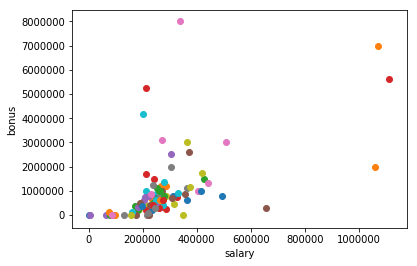

In [33]:
#salary vs. bonus
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline
### read in data dictionary, convert to numpy array
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [30]:
# to seperate the POI label from feature_list and remove email_address
label = ['poi']
features_list.remove('poi')
features_list.remove('email_address')
print len(features_list)
features_list

19


['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'from_poi_to_this_person']

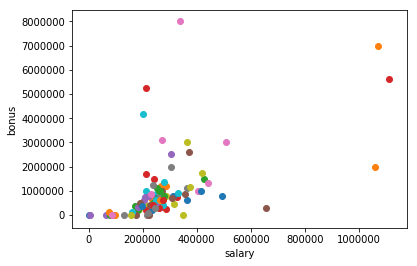

In [34]:
 #salary vs. bonus
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline
### read in data dictionary, convert to numpy array
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [35]:
# create new features of relative values of each payment feature to total_payments
payment_features = ['salary', 'bonus', 'long_term_incentive', \
                    'deferral_payments', 'loan_advances', 'other', \
                    'expenses', 'director_fees', 'deferred_income']

rel_payment = []
for feature in payment_features:
    new_feature_name = 'rel_' + feature
    df_trans[new_feature_name] = (df_trans[feature]/df_trans['total_payments']).replace([np.inf, -np.inf, np.nan], 0)
    rel_payment.append(new_feature_name)

print len(rel_payment)
rel_payment

9


['rel_salary',
 'rel_bonus',
 'rel_long_term_incentive',
 'rel_deferral_payments',
 'rel_loan_advances',
 'rel_other',
 'rel_expenses',
 'rel_director_fees',
 'rel_deferred_income']

In [36]:
payment_features.append('total_payments')
print len(payment_features)
payment_features

10


['salary',
 'bonus',
 'long_term_incentive',
 'deferral_payments',
 'loan_advances',
 'other',
 'expenses',
 'director_fees',
 'deferred_income',
 'total_payments']

In [37]:
# create new features of relative values of each stock feature to total_stock_value
stock_features = ['exercised_stock_options', 'restricted_stock', \
                  'restricted_stock_deferred']

rel_stock = []
for feature in stock_features:
    new_feature_name = 'rel_' + feature
    df_trans[new_feature_name] = (df_trans[feature]/df_trans['total_stock_value']).replace([np.inf, -np.inf, np.nan], 0)
    rel_stock.append(new_feature_name)

rel_stock

['rel_exercised_stock_options',
 'rel_restricted_stock',
 'rel_restricted_stock_deferred']

In [38]:
stock_features.append('total_stock_value')
stock_features

['exercised_stock_options',
 'restricted_stock',
 'restricted_stock_deferred',
 'total_stock_value']

In [39]:
financial_features = payment_features+stock_features
print len(financial_features)
financial_features

14


['salary',
 'bonus',
 'long_term_incentive',
 'deferral_payments',
 'loan_advances',
 'other',
 'expenses',
 'director_fees',
 'deferred_income',
 'total_payments',
 'exercised_stock_options',
 'restricted_stock',
 'restricted_stock_deferred',
 'total_stock_value']

In [40]:
rel_financial_features = rel_payment+rel_stock
print len(rel_financial_features)
rel_financial_features

12


['rel_salary',
 'rel_bonus',
 'rel_long_term_incentive',
 'rel_deferral_payments',
 'rel_loan_advances',
 'rel_other',
 'rel_expenses',
 'rel_director_fees',
 'rel_deferred_income',
 'rel_exercised_stock_options',
 'rel_restricted_stock',
 'rel_restricted_stock_deferred']

In [41]:
# create new features of fraction of emails exchanged with POI
df_trans['fraction_poi']=((df_trans['from_this_person_to_poi']+\
                          df_trans['from_poi_to_this_person'])/\
(df_trans['from_messages']+df_trans['to_messages'])).fillna(0)

df_trans['fraction_to_poi']=(df_trans['from_this_person_to_poi']/\
df_trans['from_messages']).fillna(0)

df_trans['fraction_from_poi']=(df_trans['from_poi_to_this_person']/\
df_trans['to_messages']).fillna(0)

In [42]:
# numeric feataure list which excludes email adress
email_features = ['to_messages', 'from_poi_to_this_person', 'from_messages',
                     'from_this_person_to_poi', 'shared_receipt_with_poi', 
                      'fraction_poi', 'fraction_to_poi', 'fraction_from_poi']
len(email_features)

8

In [43]:
total_features = financial_features + email_features
rel_total_features = rel_financial_features + email_features

print len(total_features)
print len(rel_total_features)

22
20


In [44]:
df_trans.describe()


bonus  deferral_payments  deferred_income  director_fees  \
count  1.440000e+02       1.440000e+02     1.440000e+02     144.000000   
mean   6.759974e+05       2.220896e+05    -1.936833e+05    9980.319444   
std    1.233155e+06       7.541013e+05     6.060111e+05   31300.575144   
min    0.000000e+00      -1.025000e+05    -3.504386e+06       0.000000   
25%    0.000000e+00       0.000000e+00    -3.708600e+04       0.000000   
50%    3.000000e+05       0.000000e+00     0.000000e+00       0.000000   
75%    8.000000e+05       8.535500e+03     0.000000e+00       0.000000   
max    8.000000e+06       6.426990e+06     0.000000e+00  137864.000000   

       exercised_stock_options       expenses  from_messages  \
count             1.440000e+02     144.000000     144.000000   
mean              2.075802e+06   35375.340278     363.583333   
std               4.795513e+06   45309.303038    1450.675239   
min               0.000000e+00       0.000000       0.000000   
25%               0.000000e+00       0.000000       0.000000   
50%               6.082935e+05   20182.000000      17.500000   
75%               1.683580e+06   53328.250000      53.000000   
max               3.434838e+07  228763.000000   14368.000000   

       from_poi_to_this_person  from_this_person_to_poi  loan_advances  \
count               144.000000               144.000000   1.440000e+02   
mean                 38.756944                24.625000   5.828125e+05   
std                  74.276769                79.778266   6.794472e+06   
min                   0.000000                 0.000000   0.000000e+00   
25%                   0.000000                 0.000000   0.000000e+00   
50%                   4.000000                 0.000000   0.000000e+00   
75%                  41.250000                14.000000   0.000000e+00   
max                 528.000000               609.000000   8.152500e+07   

             ...           rel_other  rel_expenses  rel_director_fees  \
count        ...          144.000000    144.000000         144.000000   
mean         ...            0.108559      0.095527           5.914364   
std          ...            0.221239      0.240176          58.879276   
min          ...            0.000000      0.000000           0.000000   
25%          ...            0.000000      0.000000           0.000000   
50%          ...            0.000720      0.015768           0.000000   
75%          ...            0.075646      0.055635           0.000000   
max          ...            1.000000      1.000000         701.013514   

       rel_deferred_income  rel_exercised_stock_options  rel_restricted_stock  \
count           144.000000                   144.000000            144.000000   
mean             -6.082185                     0.498924              0.403771   
std              58.868342                     0.396188              0.473146   
min            -701.013514                    -0.074502              0.000000   
25%              -0.077054                     0.000000              0.000000   
50%               0.000000                     0.627935              0.284209   
75%               0.000000                     0.850136              0.650782   
max               0.000000                     1.000000              3.493526   

       rel_restricted_stock_deferred  fraction_poi  fraction_to_poi  \
count                     144.000000    144.000000       144.000000   
mean                       -0.049046      0.028493         0.109922   
std                         0.255201      0.042827         0.185935   
min                        -2.493526      0.000000         0.000000   
25%                         0.000000      0.000000         0.000000   
50%                         0.000000      0.008772         0.000000   
75%                         0.000000      0.043337         0.198827   
max                         0.000000      0.224352         1.000000   

       fraction_from_poi  
count         144.000000  
mean            0.022

In [42]:
# check any numpy NaN
df_trans.isnull().sum().sum()

0L

In [43]:
#What are the names associated with the point above? 
from pprint import pprint
outliers_salary = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers_salary.append((key,int(val)))

top_4 = sorted(outliers_salary,key=lambda x:x[1],reverse=True)[:4]

pprint(top_4)

[('SKILLING JEFFREY K', 1111258),
 ('LAY KENNETH L', 1072321),
 ('FREVERT MARK A', 1060932),
 ('PICKERING MARK R', 655037)]


In [44]:
# are they POIs?
for people in top_4:
    if data_dict[people[0]]['poi'] == 1:
        print people[0]

SKILLING JEFFREY K
LAY KENNETH L


There were two of top 4 outlier salary were POIs.
List of data points to remove:

'TOTAL'
'LOCKHART EUGENE E'

In [45]:
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)
data_dict.pop("LOCKHART EUGENE E", 0)
len(data_dict)

144

## Feature Scaling 

I have to do some scaling by using MinMaxScaler to adjust financial (in $) and email (count) features to be equally weighted and ranged between 0-1.

In [46]:
df = pd.DataFrame(data_dict)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_trans), \
                         index=df_trans.index, columns=df_trans.columns)

In [48]:
df_scaled.shape # returns length of array and length of item


(144, 35)

In [49]:
df_scaled.describe()


bonus  deferral_payments  deferred_income  director_fees  \
count  144.000000         144.000000       144.000000     144.000000   
mean     0.084500           0.049711         0.944731       0.072392   
std      0.154144           0.115492         0.172929       0.227040   
min      0.000000           0.000000         0.000000       0.000000   
25%      0.000000           0.015698         0.989417       0.000000   
50%      0.037500           0.015698         1.000000       0.000000   
75%      0.100000           0.017005         1.000000       0.000000   
max      1.000000           1.000000         1.000000       1.000000   

       exercised_stock_options    expenses  from_messages  \
count               144.000000  144.000000     144.000000   
mean                  0.060434    0.154638       0.025305   
std                   0.139614    0.198062       0.100966   
min                   0.000000    0.000000       0.000000   
25%                   0.000000    0.000000       0.000000   
50%                   0.017710    0.088222       0.001218   
75%                   0.049015    0.233116       0.003689   
max                   1.000000    1.000000       1.000000   

       from_poi_to_this_person  from_this_person_to_poi  loan_advances  \
count               144.000000               144.000000     144.000000   
mean                  0.073403                 0.040435       0.007149   
std                   0.140676                 0.130999       0.083342   
min                   0.000000                 0.000000       0.000000   
25%                   0.000000                 0.000000       0.000000   
50%                   0.007576                 0.000000       0.000000   
75%                   0.078125                 0.022989       0.000000   
max                   1.000000                 1.000000       1.000000   

             ...           rel_other  rel_expenses  rel_director_fees  \
count        ...          144.000000    144.000000         144.000000   
mean         ...            0.108559      0.095527           0.008437   
std          ...            0.221239      0.240176           0.083992   
min          ...            0.000000      0.000000           0.000000   
25%          ...            0.000000      0.000000           0.000000   
50%          ...            0.000720      0.015768           0.000000   
75%          ...            0.075646      0.055635           0.000000   
max          ...            1.000000      1.000000           1.000000   

       rel_deferred_income  rel_exercised_stock_options  rel_restricted_stock  \
count           144.000000                   144.000000            144.000000   
mean              0.991324                     0.533666              0.115577   
std               0.083976                     0.368718              0.135435   
min               0.000000                     0.000000              0.000000   
25%               0.999890                     0.069336              0.000000   
50%               1.000000                     0.653732              0.081353   
75%               1.000000                     0.860527              0.186282   
max               1.000000                     1.000000              1.000000   

       rel_restricted_stock_deferred  fraction_poi  fraction_to_poi  \
count                     144.000000    144.000000       144.000000   
mean                        0.980331      0.127001         0.109922   
std                         0.102345      0.190891         0.185935   
min                         0.000000      0.000000         0.000000   
25%                         1.000000      0.000000         0.000000   
50%                         1.000000      0.039099         0.000000   
75%                         1.000000      0.193167         0.198827   
max                         1.000000      1.000000         1.000000   

       fraction_from_poi  
count         144.000000  
mean            0.104317  
std             0.167558  
min       

# Features processing
The data has been cleaned. The functions below added a new feature.
From the intuition about the data, I guessed that the more message exchanged among POIs (fraction of from_this_person_to_poi and from_poi_to_this_person to total_message) the more chance of the person is POI.





In [50]:
def get_total(key1, key2):
    'merge 2 lists in one, and assign NaN = 0'
    Nlist = []
    for i in data_dict:
        # assign NaN to 0
        if data_dict[i][key1] == 'NaN' or data_dict[i][key2] == 'NaN':
            Nlist.append(0.)
        elif data_dict[i][key1]>=0:
            Nlist.append(float(data_dict[i][key1]) + float(data_dict[i][key2]))
    return Nlist

In [51]:
# get the total poi related emails:
T_poi_emails = get_total('from_this_person_to_poi', 'from_poi_to_this_person')

In [52]:
# get the total emails
total_emails = get_total('to_messages', 'from_messages')

In [53]:
def fraction_l(list1, list2):
    'devide one list by other'
    fractionl = []
    for i in range(0,len(list1)):
        if list2[i] == 0.0:
            fractionl.append(0.0)
                
        else:
            fractionl.append(float(list1[i])/float(list2[i]))
            #print fraction
    return fractionl

In [54]:
# get the fraction of poi emails
fraction_poi_emails = fraction_l(T_poi_emails, total_emails)

In [55]:
# add this new feature to the data
count = 0
for i in data_dict:
    data_dict[i]['fraction_poi_emails'] = fraction_poi_emails[count]
    count += 1

# test
print 'SKILLING fraction_poi_emails: ', data_dict['SKILLING JEFFREY K']['fraction_poi_emails']

SKILLING fraction_poi_emails:  0.031593038822


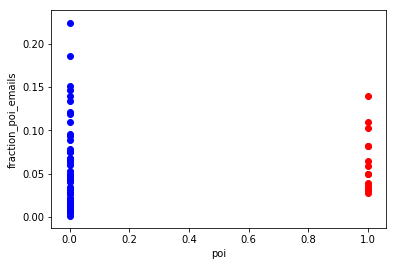

In [56]:
# let's test if this feature has any correlation with POIs
new_features_l = ['poi', 'fraction_poi_emails']
data = featureFormat(data_dict, new_features_l)

%matplotlib inline
### your code below
for point in data:
    poi = point[0]
    fraction_poi_emails = point[1]
    #matplotlib.pyplot.boxplot( data )
    if point[0] == 1:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'r')
    else:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'b')
    #matplotlib.pyplot.boxplot(data)
matplotlib.pyplot.xlabel("poi")
matplotlib.pyplot.ylabel("fraction_poi_emails")
matplotlib.pyplot.show()

There is a different of fraction of poi and non-poi emails. 


## Original features


In [57]:
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [58]:

# load the data
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

# features_list
features_list = ['poi','salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)



In [59]:

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'
# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])




Accuracy: 0.844827586207
Precision:  0.333333333333
Recall:  0.125
Decision Tree algorithm run time:  0.028 s
Feature Ranking: 
1 feature salary (0.337437907714)
2 feature from_poi_to_this_person (0.161410018553)
3 feature from_this_person_to_poi (0.109563164109)
4 feature to_messages (0.101688311688)
5 feature deferral_payments (0.0753246753247)
6 feature total_payments (0.0753246753247)
7 feature exercised_stock_options (0.0564935064935)
8 feature bonus (0.048961038961)
9 feature restricted_stock (0.0337967018319)
10 feature shared_receipt_with_poi (0.0)



For feature ranking, it first looked like the feature ranking just rank to the order of the feature list. This may not work very well. It could be better to use SelectKbest.


The new features improved recall but not accuracy and precision. So, I decided not to use the new feature.

I see that though the accuracy was hight 0.84 but the precision and recall was low. The reason was having imbalanced classes like we have in the Enron dataset (many more non-POIs than POIs) introduces some special challenges, namely that I can just guess the more common class label for every point, not a very insightful strategy, and still get pretty good accuracy. Precision and recall can help illuminate my performance better.



In [60]:
# select 7 features that have highest ANOVA F-value with the factor by poi label
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=7)
selected7 = selector.fit_transform(df_scaled[features_list], df_scaled['poi'])
selected7.shape

/anaconda2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


(144, 7)

In [61]:
# Feature Scores¶
scores = zip(features_list, selector.scores_, selector.pvalues_)
sorted_scores = sorted(scores, key = lambda x: x[1], reverse=True)
print"features with F-value & p-value:"
n=0
while (n < len(sorted_scores)):
    print n+1, sorted_scores[n]
    n +=1

features with F-value & p-value:
1 ('poi', inf, 0.0)
2 ('exercised_stock_options', 25.097541528735491, 1.5945438463623382e-06)
3 ('total_stock_value', 24.467654047526391, 2.1058066490127594e-06)
4 ('bonus', 21.060001707536578, 9.7024743412322453e-06)
5 ('salary', 18.575703268041778, 3.0337961075305315e-05)
6 ('deferred_income', 11.595547659732164, 0.00085980314391924004)
7 ('long_term_incentive', 10.072454529369448, 0.0018454351466116368)
8 ('restricted_stock', 9.3467007910514379, 0.0026699611393240469)
9 ('total_payments', 8.8667215371077805, 0.0034159213705928374)
10 ('shared_receipt_with_poi', 8.7464855321290802, 0.0036344020243633686)
11 ('loan_advances', 7.2427303965360172, 0.0079738162605691599)
12 ('expenses', 6.234201140506757, 0.013673150875383932)
13 ('from_poi_to_this_person', 5.3449415231473347, 0.022220727960811395)
14 ('other', 4.2049708583014187, 0.042144700903259204)
15 ('from_this_person_to_poi', 2.4265081272428799, 0.12152433983710857)
16 ('director_fees', 2.107655943

In [62]:
optimized_features_list = list(map(lambda x: x[0], sorted_scores))[0:7]
print(optimized_features_list)

['poi', 'exercised_stock_options', 'total_stock_value', 'bonus', 'salary', 'deferred_income', 'long_term_incentive']


I have noticed that some features (e.g. bonus, salary, and deferred_income) with "NaN" value disproportionally distributed between POI vs. non-POI groups show statistically strong relationship with labels. It is possible that the F-score was influenced by "NaN" driving biases.



I think a proper validation method for the dataset with imbalanced classes is using cross validation iterators with stratification based on class labels, such as StratifiedKFold and StratifiedShuffleSplit. This would ensure that relative class frequencies is approximately preserved in each train and test set.

In [63]:
# generate a 3 train-test pairs iterator with test set size = 0.33
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=44)

for train_index, test_index in skf.split(selected7, df_scaled['poi']):
   #print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = selected7[train_index], selected7[test_index]
   y_train, y_test = df_scaled['poi'][train_index], df_scaled['poi'][test_index]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(96, 7) (96,)
(48, 7) (48,)


In [64]:
# generate a 1000 train-test pairs iterator with test set size = 0.1
from sklearn.model_selection import StratifiedShuffleSplit

#sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.33, random_state=44)
sss = StratifiedShuffleSplit(n_splits=1000, random_state=44)

for train_index, test_index in sss.split(selected7, df_scaled['poi']):
   #print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = selected7[train_index], selected7[test_index]
   y_train, y_test = df_scaled['poi'][train_index], df_scaled['poi'][test_index]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(129, 7) (129,)
(15, 7) (15,)


To evaluate the project, project reviewers use tester.py. Thus, it is convenient for me to use the same validation method. 


Because we dealing with small amounts of data, we can try  many algorithms as possible to find the best one.

SVC

KNeighbors

Gaussian Naive Bayes

Decision Trees

Adaboost (boosted decision tree)

Random Forest




## SVC
Parameters

- C (penalty): 'clf__C': [0.1, 1, 10, 100, 1000]
- kernal: 'clf__kernel': ['rbf', 'linear', 'poly'],
- gamma (kernal coefficient): 'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001]
- tol (Tolerance for stopping criterion): 'clf__tol': [1e-3, 1e-4, 1e-5]
-class_weight: 'clf__class_weight': ['balanced', None]

In [65]:
# fit into SVC classifier and get accuracy using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc = SVC()

scores = cross_val_score(svc, selected7, df_scaled['poi'], cv=sss)
scores.mean()

1.0

##  GaussianNB Classifier
Parameters
priors (Prior probabilities of the classes): default = None; meaning the priors are adjusted according to the data


In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

scores = cross_val_score(gnb, selected7, df_scaled['poi'], cv=sss)
scores.mean()

1.0

## KNeighbors Classifier

Parameters
- n_neighbors : 'clf__n_neighbors': [5, 8, 10, 15]
- weights : 'clf__weights' : ['uniform','distance']
- algorithm : 'clf__algorithm' : [‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’]
- metric (distance metric) : 'clf__metric' : ['euclidean', 'manhattan', 'minkowski']

In [67]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()

scores = cross_val_score(neigh, selected7, df_scaled['poi'], cv=sss)
scores.mean()

1.0

## DecisionTree Classifier

Parameters
- criterion (measurement for split quality): 'clf__n_estimators': [“gini”, “entropy”]
- splitter: 'clf__splitter': [“best”, “random”]
- max_features : 'clf__max_features': [0.5, “auto”, “log2”, None]
- max_depth : 'clf__max_depth': [3, 5, 10, None]
- min_samples_leaf : 'clf__min_samples_leaf': [5, 4, 3, 2, 1]
- class_weight: 'clf__class_weight': [“balanced_subsample”, “balanced”, None]

In [68]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

scores = cross_val_score(dt, selected7, df_scaled['poi'], cv=sss)
scores.mean()

1.0

## RandomForest Classifier

Parameters
- n_estimators (the number of trees in the forest) : 'clf__n_estimators': [10, 50, 100, 200]
- criterion (measurement for split quality): 'clf__criterion': [“gini”, “entropy”]
- max_features : 'clf__max_features': [0.5, “auto”, “log2”, None]
- max_depth : 'clf__max_depth': [3, 5, 10, None]
- min_samples_leaf : 'clf__min_samples_leaf': [5, 4, 3, 2, 1]
- class_weight: 'clf__class_weight': [“balanced”, None]

In [69]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()

scores = cross_val_score(rdf, selected7, df_scaled['poi'], cv=sss)
scores.mean()

0.99086666666666678

## AdaBoost Classifier

Parameters
- base_estimator: default=DecisionTreeClassifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

scores = cross_val_score(adb, selected7, df_scaled['poi'], cv=sss)
scores.mean()

1.0

evaluation metrics and the average performance for each of them.
- accuracy: correct label (predicted label == true label)/total testing data points
- precision: true POI/(true POI + false non-POI)
- recall: true POI/(true POI + false POI)
- average_precision: the area under the precision-recall curve
- f1: 2 (precision recall) / (precision + recall)
- f1_weighted: Calculate metrics for each label, and find their - - average, weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.


In [71]:
# compare evaluating metrics on SVC 
scorer = ["accuracy", "precision", "recall", "average_precision", "f1", "f1_weighted"]
def print_scores(clf):
    for score in scorer:
        m_score = cross_val_score(clf, selected7, df_scaled['poi'], cv=sss, \
                        scoring=score).mean()
        print score, ':', m_score

print_scores(svc)

accuracy : 1.0
precision : 1.0
recall : 1.0
average_precision : 1.0
f1 : 1.0
f1_weighted : 1.0


In [72]:

# features_list
features_list = ['poi','deferral_payments', 'exercised_stock_options', 'bonus', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'director_fees', 'deferred_income']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.896551724138
Precision:  0.666666666667
Recall:  0.5
F1 score: 0.571428571429
Decision Tree algorithm run time:  0.009 s


##### the precision and recall was much better with value of 0.5 and 0.375 respectively.

In [73]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'
# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])




Accuracy: 0.896551724138
Precision:  0.666666666667
Recall:  0.5
Decision Tree algorithm run time:  0.036 s
Feature Ranking: 
1 feature deferral_payments (0.337437907714)
2 feature exercised_stock_options (0.177012987013)
3 feature bonus (0.161410018553)
4 feature restricted_stock_deferred (0.111071978869)
5 feature total_stock_value (0.0753246753247)
6 feature expenses (0.0753246753247)
7 feature from_messages (0.0624177572018)
8 feature other (0.0)
9 feature director_fees (0.0)
10 feature deferred_income (0.0)


For feature ranking, it first looked like the feature ranking just rank to the order of the feature list. This may not work very well. It could be better to use SelectKbest.


The new features improved recall but not accuracy and precision. So, I decided not to use the new feature.

I see that though the accuracy was hight 0.84 but the precision and recall was low. The reason was having imbalanced classes like we have in the Enron dataset (many more non-POIs than POIs) introduces some special challenges, namely that I can just guess the more common class label for every point, not a very insightful strategy, and still get pretty good accuracy. Precision and recall can help illuminate my performance better.


In [74]:
# compare evaluating metrics on SVC 
scorer = ["accuracy", "precision", "recall", "average_precision", "f1", "f1_weighted"]
def print_scores(clf):
    for score in scorer:
        m_score = cross_val_score(clf, selected7, df_scaled['poi'], cv=sss, \
                        scoring=score).mean()
        print score, ':', m_score

print_scores(svc)

accuracy : 1.0
precision : 1.0
recall : 1.0
average_precision : 1.0
f1 : 1.0
f1_weighted : 1.0


In [75]:
# compare evaluating metrics on GaussianNB
print_scores(gnb)

accuracy : 1.0
precision : 1.0
recall : 1.0
average_precision : 1.0
f1 : 1.0
f1_weighted : 1.0


I can use automated parameter search processes, such as GridSearchCV and RandomizedSearchCV.



In [76]:
# tune parameters of SVC using GridSearchCV
from sklearn.model_selection import GridSearchCV

clf = svc
parameters = {'kernel': ['rbf', 'linear', 'poly'], \
              'C': [0.1, 1, 10, 100, 1000],\
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], \
              'degree': [3, 4, 5], \
              'class_weight':['balanced', None]}

grid_search = GridSearchCV(clf, parameters)
grid_result = grid_search.fit(selected7, df_scaled['poi']).best_estimator_
grid_result

SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
# compare evaluating metrics on best estimator from grid search cv
print_scores(grid_result)

accuracy : 1.0
precision : 1.0
recall : 1.0
average_precision : 1.0
f1 : 1.0
f1_weighted : 1.0


In [78]:
# tune parameters of SVC using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters = {'kernel': ['rbf', 'linear', 'poly'], \
              'C': scipy.stats.expon(scale=100), \
              'gamma': scipy.stats.expon(scale=.1), \
              'class_weight':['balanced', None]}

random_search = RandomizedSearchCV(clf, parameters, n_iter=20)
start = time()
random_result = random_search.fit(selected7, df_scaled['poi']).best_estimator_
random_result

SVC(C=196.69735223353592, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.082969450069705811,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
# compare evaluating metrics on best estimator from randomized search cv
print_scores(random_result)

accuracy : 1.0
precision : 1.0
recall : 1.0
average_precision : 1.0
f1 : 1.0
f1_weighted : 1.0


# Tune an algorithm
##### Random Forest

In [80]:
features_list = ['poi','deferral_payments', 'exercised_stock_options', 'bonus', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'director_fees', 'deferred_income']
data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
t0 = time()
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Random algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.862068965517
Precision:  0.0
Recall:  0.0
F1 score: 0.0
Random algorithm run time:  0.404 s


/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy is the same as the decision tree but precision and recall are deffrent.

# Adaboost


In [81]:
from sklearn.ensemble import AdaBoostClassifier
t0 = time()
clf = AdaBoostClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Adaboost algorithm run time: ', round(time()-t0, 3), 's'



Accuracy: 0.793103448276
Precision:  0.3
Recall:  0.375
F1 score: 0.333333333333
Adaboost algorithm run time:  0.245 s


Comparing to decision tree, accuracy was slightly lower, recall was the same and precision was lower.


In [82]:
# Create a procedue to take feature list and result from pipeline grid search
# and return cross-validation evalutating metrics using tester.py module
def performance(old_list, grid_result):
    selector = gird_result.named_steps['selector']
    k_features = gird_result.named_steps['selector'].get_params(deep=True)['k']
    print "Number of features selected: %i" %(k_features)
    selected = selector.fit_transform(df_scaled[old_list], df_scaled['poi'])
    scores = zip(old_list, selector.scores_, selector.pvalues_)
    sorted_scores = sorted(scores, key = lambda x: x[1], reverse=True)
    new_list = list(map(lambda x: x[0], sorted_scores))[0:k_features]
    new_list = ['poi']+ new_list
    new_dataset = df_scaled[new_list].to_dict(orient = 'index')  
    new_clf = gird_result.named_steps['clf']
    tester.dump_classifier_and_data(new_clf, new_dataset, new_list)
    tester.main()
    print "\nThis took %.2f seconds\n" %(time() - start)
    print "--------------------------------------------------------"

In [83]:
# select 7 features that have highest ANOVA F-value with the factor by poi label
selected7 = selector.fit_transform(df_scaled[rel_total_features], df_scaled['poi'])
scores = zip(rel_total_features, selector.scores_, selector.pvalues_)
sorted_scores = sorted(scores, key = lambda x: x[1], reverse=True)
print"features with F-value & p-value:"
n=0
while (n < len(sorted_scores)):
    print n+1, sorted_scores[n]
    n +=1

features with F-value & p-value:
1 ('rel_bonus', 20.988768488080161, 1.002166059752133e-05)
2 ('fraction_to_poi', 16.641707070468989, 7.4941540250267645e-05)
3 ('rel_long_term_incentive', 14.014032672700869, 0.00026283167217943732)
4 ('shared_receipt_with_poi', 8.7464855321290802, 0.0036344020243633686)
5 ('fraction_poi', 5.5185055438125357, 0.020194477662584531)
6 ('rel_loan_advances', 5.396395592254871, 0.021598722340364536)
7 ('from_poi_to_this_person', 5.3449415231473347, 0.022220727960811395)
8 ('fraction_from_poi', 3.2107619169667667, 0.075284900599149329)
9 ('rel_salary', 2.7730011744152487, 0.098071056290785164)
10 ('from_this_person_to_poi', 2.4265081272428799, 0.12152433983710857)
11 ('to_messages', 1.6988243485808538, 0.19455111487450777)
12 ('rel_deferral_payments', 1.3381166890229022, 0.24930866438997767)
13 ('rel_restricted_stock', 1.1488763692954786, 0.28560279187395243)
14 ('rel_restricted_stock_deferred', 0.75851839176838753, 0.38526259639292249)
15 ('rel_other', 0.717

In [84]:
# create finalized_features_list with selected 7 features
finalized_features_list = list(map(lambda x: x[0], sorted_scores))[0:7]
print(finalized_features_list)

['rel_bonus', 'fraction_to_poi', 'rel_long_term_incentive', 'shared_receipt_with_poi', 'fraction_poi', 'rel_loan_advances', 'from_poi_to_this_person']


In [86]:
new_list = ['poi']+ finalized_features_list
new_dataset = df_scaled[new_list].to_dict(orient = 'index')  
new_clf = SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0, \
              decision_function_shape=None, degree=3, gamma=1, kernel='poly', \
              max_iter=-1, probability=False, random_state=None, \
              shrinking=True, tol=0.001, verbose=False)
    
tester.dump_classifier_and_data(new_clf, new_dataset, new_list)
tester.main()


SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.85409	Precision: 0.59500	Recall: 0.61850	F1: 0.60652	F2: 0.61365
	Total predictions: 11000	True positives: 1237	False positives:  842	False negatives:  763	True negatives: 8158



# Analysis Validation and Performance


In [87]:
### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
features_list = ["poi", "from_poi_to_this_person", "from_this_person_to_poi", 'shared_receipt_with_poi']


### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)


### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)


### machine learning goes here!
### please name your classifier clf for easy export below


In [89]:
## machine learning goes here!
### please name your classifier clf for easy export below

### deploying feature selection
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print 'accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives
print 'recall = ', recall_score(labels_test,pred)


### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

accuracy before tuning  0.821428571429
Decision tree algorithm time: 0.003 s
done in 0.002s
Validating algorithm:
accuracy after tuning =  0.857142857143
precision =  0.4
recall =  0.666666666667
